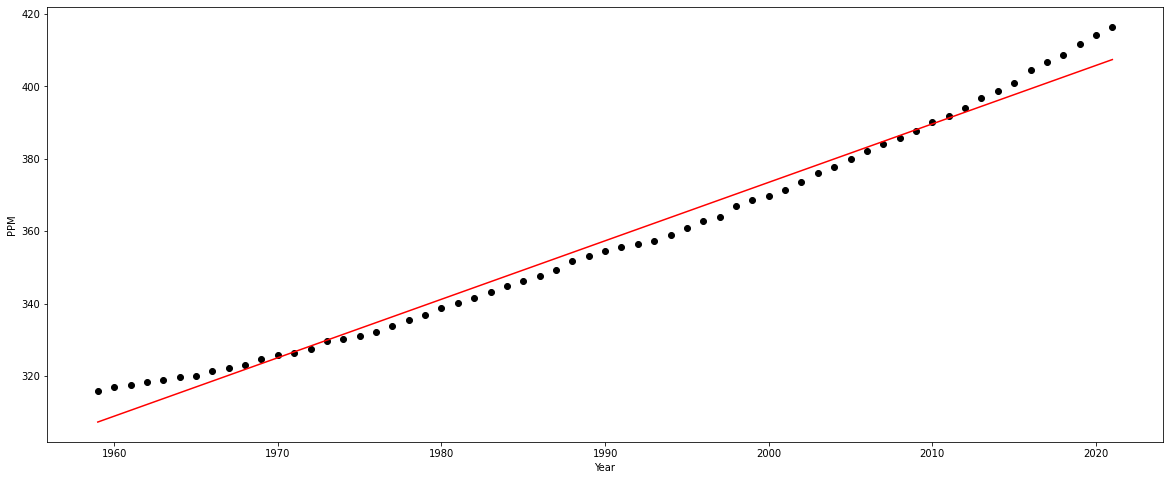

Fitted equation：Y = 1.614036X + -2854.593264
[[1.6140361]]
[-2854.59326421]
0.9824637498719381
Poly2 Prediction Results:
avg = -0.0000000000, std = 3.9526920518


In [1]:
#linear
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import plotly.graph_objects as go

# 已有数据
df = pd.read_excel('2022_HiMCM_Data-B-co2.xlsx',sheet_name="origin")
year = df['Year'].tolist()
ppm = df['PPM'].tolist()

# 数据处理
# sklearn 拟合输入输出一般都是二维数组，这里将一维转换为二维。
year = np.array(year).reshape(-1, 1)
ppm = np.array(ppm).reshape(-1, 1)

# 拟合
reg = LinearRegression()
reg.fit(year, ppm) #最小二乘法

# 可视化
prediction = reg.predict(year)                # 根据高度，按照拟合的曲线预测
plt.figure('PPM~Year', figsize=(20,8))
plt.xlabel('Year')
plt.ylabel('PPM')
plt.scatter(year, ppm, c='black')
plt.plot(year, prediction, c='red')
plt.show()


a = reg.coef_[0][0]     # 系数
b = reg.intercept_[0]   # 截距
print('Fitted equation：Y = %.6fX + %.6f' % (a, b))
# out: 拟合的方程为：Y = 1.614036X + -2854.593264

R_square = r2_score(ppm, prediction) 

print(reg.coef_)
print(reg.intercept_)
print(R_square)

def get_linear(year):
    return a * year + b 

maxrange = 0.0
deviation = np.empty(0,dtype=np.float64)

print("Poly2 Prediction Results:")
for i in range(1959, 2022):
    pdict = get_linear(i)
    dd = pdict - ppm[i-1959]  #difference
    deviation = np.append(deviation, dd)

# _____________________________________________________________________________________________

avg = np.average(deviation)
std = np.std(deviation, ddof=1)
print("avg = %.10f, std = %.10f" %(avg, std))

ystart = 1959
yend_true_data = 2021
yend = 2201

year = np.linspace(ystart, yend-1,yend - ystart )

pdict = np.empty(0,dtype=np.float64)
pdict_scatter = np.empty(0,dtype=np.float64)


for y in range(ystart, yend):
    predict = get_linear(y)
    pdict = np.append(pdict, predict)

    if y <= yend_true_data:
        # use the real/true numbers.
        pdict_scatter = np.append(pdict_scatter, ppm[y-ystart])
        
    else :
        randft = np.random.normal(avg, std)
        pdict_scatter = np.append(pdict_scatter, predict + randft)


fig = go.Figure()
fig.add_traces(go.Scatter(x=year[:yend_true_data-ystart+1], y=pdict_scatter[:yend_true_data-ystart+1], mode = "markers", name = "true data before 2021"))
fig.add_traces(go.Scatter(x=year[yend_true_data-ystart+1:], y=pdict_scatter[yend_true_data-ystart+1:], mode = "markers", name = "predict data after 2021"))
fig.add_traces(go.Scatter(x=year, y=pdict, name = "trendline"))

fig.update_layout( 
        xaxis = dict(
            title = "Year"
        ),
        yaxis = dict(
            title = "PPM"
        ),
        title='PPM Increment with Years',
        title_x=0.5,
        # autosize=False,
        width=2000,
        height=1000,
    )
fig.show()

In [2]:
fig.show()

In [3]:

# 数据处理
# sklearn 拟合输入输出一般都是二维数组，这里将一维转换为二维。
year = np.array(year).reshape(-1, 1)
ppm = np.array(ppm).reshape(-1, 1)

# 拟合
reg = LinearRegression()
reg.fit(year, ppm) #最小二乘法

# 可视化
prediction = reg.predict(year)                # 根据高度，按照拟合的曲线预测
plt.figure('PPM~Year', figsize=(20,8))
plt.xlabel('Year')
plt.ylabel('PPM')
plt.scatter(year, ppm, c='black')
plt.plot(year, prediction, c='red')
plt.show()


a = reg.coef_[0][0]     # 系数
b = reg.intercept_[0]   # 截距
print('拟合的方程为：Y = %.6fX + %.6f' % (a, b))
# out: 拟合的方程为：Y = 1.614036X + -2854.593264

R_square = r2_score(ppm, prediction) 

print(reg.coef_)
print(reg.intercept_)
print(R_square)

def get_linear(year):
    return a * year + b 

maxrange = 0.0
deviation = np.empty(0,dtype=np.float64)

print("Poly2 Prediction Results:")
for i in range(1959, 2022):
    pdict = get_linear(i)
    dd = pdict - ppm[i-1959]  #difference
    deviation = np.append(deviation, dd)

# _____________________________________________________________________________________________

avg = np.average(deviation)
std = np.std(deviation, ddof=1)
print("avg = %.10f, std = %.10f" %(avg, std))

ystart = 1959
yend_true_data = 2021
yend = 2101

year = np.linspace(ystart, yend-1,yend - ystart )

pdict = np.empty(0,dtype=np.float64)
pdict_scatter = np.empty(0,dtype=np.float64)


for y in range(ystart, yend):
    predict = get_linear(y)
    pdict = np.append(pdict, predict)

    if y <= yend_true_data:
        # use the real/true numbers.
        pdict_scatter = np.append(pdict_scatter, ppm[y-ystart])
        
    else :
        randft = np.random.normal(avg, std)
        pdict_scatter = np.append(pdict_scatter, predict + randft)


fig = go.Figure()
fig.add_traces(go.Scatter(x=year[:yend_true_data-ystart+1], y=pdict_scatter[:yend_true_data-ystart+1], mode = "markers", name = "true data before 2021"))
fig.add_traces(go.Scatter(x=year[yend_true_data-ystart+1:], y=pdict_scatter[yend_true_data-ystart+1:], mode = "markers", name = "predict data after 2021"))
fig.add_traces(go.Scatter(x=year, y=pdict, name = "trendline"))

fig.update_layout( 
        xaxis = dict(
            title = "Year"
        ),
        yaxis = dict(
            title = "PPM"
        ),
        title='PPM Increment with Years',
        title_x=0.5,
        # autosize=False,
        width=2000,
        height=1000,
    )
fig.show()

ValueError: Found input variables with inconsistent numbers of samples: [242, 63]

In [ ]:



# # 可视化
# prediction = reg.predict(year)                # 根据高度，按照拟合的曲线预测
# plt.figure('PPM~Year', figsize=(20,8))
# plt.xlabel('Year')
# plt.ylabel('PPM')
# plt.scatter(year, ppm, c='black')
# plt.plot(year, prediction, c='red')
# plt.show()


# a = reg.coef_[0][0]     # 系数
# b = reg.intercept_[0]   # 截距
# print('拟合的方程为：Y = %.6fX + %.6f' % (a, b))
# # out: 拟合的方程为：Y = 1.614036X + -2854.593264


# R_square = r2_score(ppm, prediction) 

# print(reg.coef_)
# print(reg.intercept_)
# print(R_square)



# def get_linear(year):
#     return a * year + b 

# print("Linear Prediction Results:")
# # for i in range(2021, 2101):
# #     print('Year-%d : %.2f' % (i, get_linear(i)))

In [ ]:
# reg.fit(year, ppm) #最小二乘法



# # 可视化
# prediction = reg.predict(year)                # 根据高度，按照拟合的曲线预测
# plt.figure('PPM~Year', figsize=(20,8))
# plt.xlabel('Year')
# plt.ylabel('PPM')
# plt.scatter(year, ppm, c='black')
# plt.plot(year, prediction, c='red')
# plt.show()


# a = reg.coef_[0][0]     # 系数
# b = reg.intercept_[0]   # 截距
# print('拟合的方程为：Y = %.6fX + %.6f' % (a, b))
# # out: 拟合的方程为：Y = 1.614036X + -2854.593264


# R_square = r2_score(ppm, prediction) 

# print(reg.coef_)
# print(reg.intercept_)
# print(R_square)



# def get_linear(year):
#     return a * year + b 

# print("Linear Prediction Results:")
# # for i in range(2021, 2101):
# #     print('Year-%d : %.2f' % (i, get_linear(i)))

Coefficients: 
 [[0.85571429]]
Mean squared error: 546.64
Coefficient of determination: 0.18


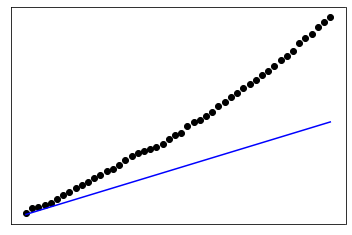

In [ ]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


# 已有数据
df = pd.read_excel('2022_HiMCM_Data-B-co2.xlsx',sheet_name="origin")
year = df['Year'].to_numpy()
ppm = df['PPM'].to_numpy()

# print(year)
# Load the  dataset
# diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
# print(diabetes_X)

diabetes_X = year
diabetes_y = ppm

# Use only one feature
# diabetes_X = diabetes_X[:, np.newaxis, 2]
# print(diabetes_X)

diabetes_X = np.array(diabetes_X).reshape(-1, 1)
diabetes_y = np.array(diabetes_y).reshape(-1, 1)

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-50]
diabetes_X_test = diabetes_X[-50:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-50]
diabetes_y_test = diabetes_y[-50:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue")

plt.xticks(())
plt.yticks(())

plt.show()

拟合的方程为：Y = -0.006570X + 12.718507


c:\Users\bzhu5\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


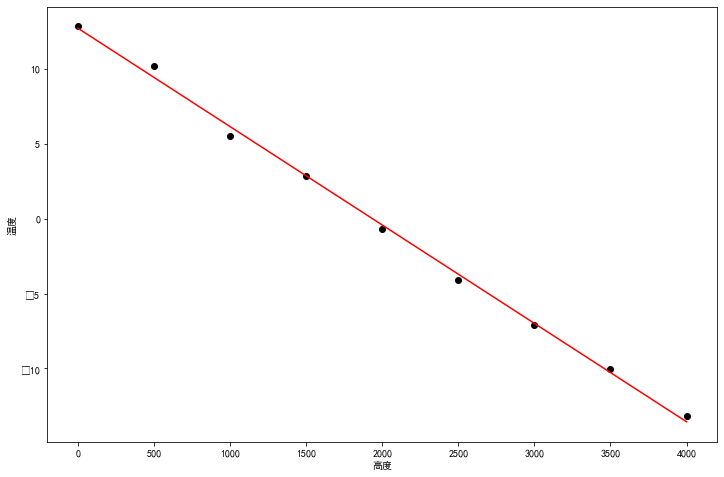

In [ ]:
# 导入所需的模块
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 已有数据
height = [0.0, 500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0, 3500.0, 4000.0]
temp = [12.834044009405147, 10.190648986884316, 5.50022874963469, 2.8546651452636795, -0.7064882183657739, -4.065322810462405, -7.1274795772446575, -10.058878545913904, -13.206465051538661]


# 数据处理
# sklearn 拟合输入输出一般都是二维数组，这里将一维转换为二维。
height = np.array(height).reshape(-1, 1)
temp = np.array(temp).reshape(-1, 1)

# 拟合
reg = LinearRegression()
reg.fit(height, temp)
a = reg.coef_[0][0]     # 系数
b = reg.intercept_[0]   # 截距
print('拟合的方程为：Y = %.6fX + %.6f' % (a, b))
# out: 拟合的方程为：Y = -0.006570X + 12.718507

# 可视化
prediction = reg.predict(height)                # 根据高度，按照拟合的曲线预测温度值
plt.figure('海拔高度~温度关系曲线拟合结果', figsize=(12,8))
plt.rcParams['font.family'] = ['sans-serif']    # 设置matplotlib 显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']    # 设置matplotlib 显示中文
plt.xlabel('高度')
plt.ylabel('温度')
plt.scatter(height,temp,  c='black')
plt.plot(height, prediction, c='r')
plt.show()

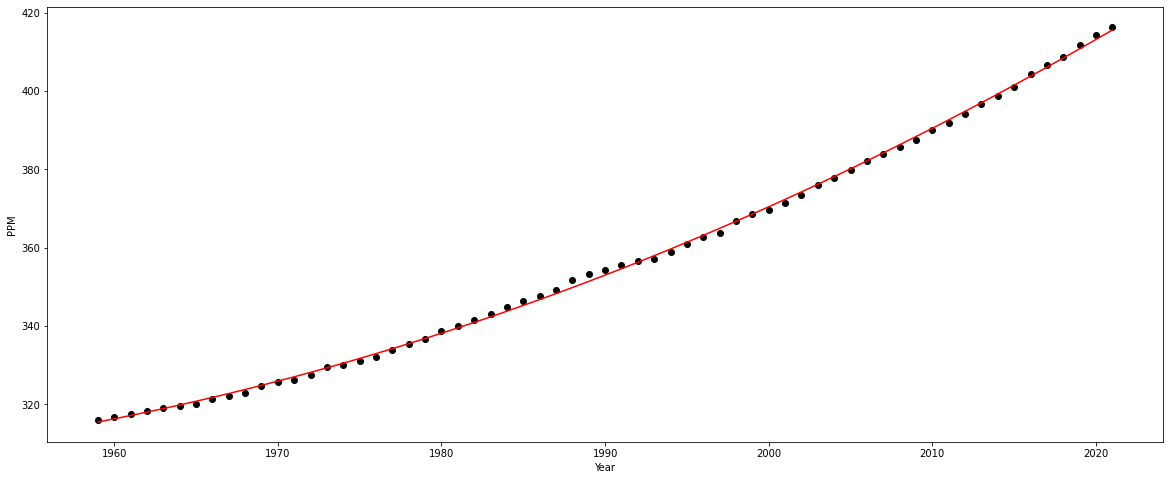

[ 0.00000000e+00 -5.02757537e+01  1.30376356e-02]
0.0
-50.27575366626596
0.01303763561923236
48771.436440064346
Poly2 Prediction Results:
Year-2022 : 418.03
Year-2023 : 420.49
Year-2024 : 422.98
Year-2025 : 425.49
Year-2026 : 428.03
Year-2027 : 430.60
Year-2028 : 433.19
Year-2029 : 435.81
Year-2030 : 438.45
Year-2031 : 441.12
Year-2032 : 443.82
Year-2033 : 446.54
Year-2034 : 449.29
Year-2035 : 452.06
Year-2036 : 454.86
Year-2037 : 457.69
Year-2038 : 460.54
Year-2039 : 463.42
Year-2040 : 466.32
Year-2041 : 469.25
Year-2042 : 472.21
Year-2043 : 475.19
Year-2044 : 478.20
Year-2045 : 481.24
Year-2046 : 484.30
Year-2047 : 487.39
Year-2048 : 490.50
Year-2049 : 493.64
Year-2050 : 496.81
Year-2051 : 500.00
Year-2052 : 503.21
Year-2053 : 506.46
Year-2054 : 509.73
Year-2055 : 513.02
Year-2056 : 516.35
Year-2057 : 519.69
Year-2058 : 523.07
Year-2059 : 526.47
Year-2060 : 529.89
Year-2061 : 533.35
Year-2062 : 536.83
Year-2063 : 540.33
Year-2064 : 543.86
Year-2065 : 547.42
Year-2066 : 551.00
Year-20

In [ ]:
#quadratic
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


plt.figure('PPM~Year', figsize=(20,8))
plt.xlabel('Year')
plt.ylabel('PPM')


# 已有数据
df = pd.read_excel('2022_HiMCM_Data-B-co2.xlsx',sheet_name="origin")
year = df['Year'].tolist()
ppm = df['PPM'].tolist()
plt.scatter(year, ppm, c="black")


# f(x) = 2x^2 + 1x + 1
# f = np.poly1d([2,1,1])
# y = f(x)

# 2D
year = np.reshape(year, (-1,1))


# 2 次多项式
ploy_reg = PolynomialFeatures(degree=2)
year_ploy = ploy_reg.fit_transform(year)

lin_reg=LinearRegression()
lin_reg.fit(year_ploy,ppm)

ppm_pred = lin_reg.predict(year_ploy)


plt.plot(year, ppm_pred, c="red")
plt.show()

print(lin_reg.coef_)

a = lin_reg.coef_[0]
b = lin_reg.coef_[1]
c = lin_reg.coef_[2]
d = lin_reg.intercept_
print(a)
print(b)
print(c)
print(d)

def get_poly2(year):
    return lin_reg.coef_[2] * year * year + lin_reg.coef_[1] * year + lin_reg.intercept_

print("Poly2 Prediction Results:")
for i in range(1959, 2022):
    pdict = get_poly2(i)
    dd = pdict - ppm[i-1959]  #difference
    # print('Year-%d : %.2f -> %.2f' % (i, pdict, dd))


for i in range(2022, 2101):
    pdict = get_poly2(i)
    print('Year-%d : %.2f' % (i, pdict))



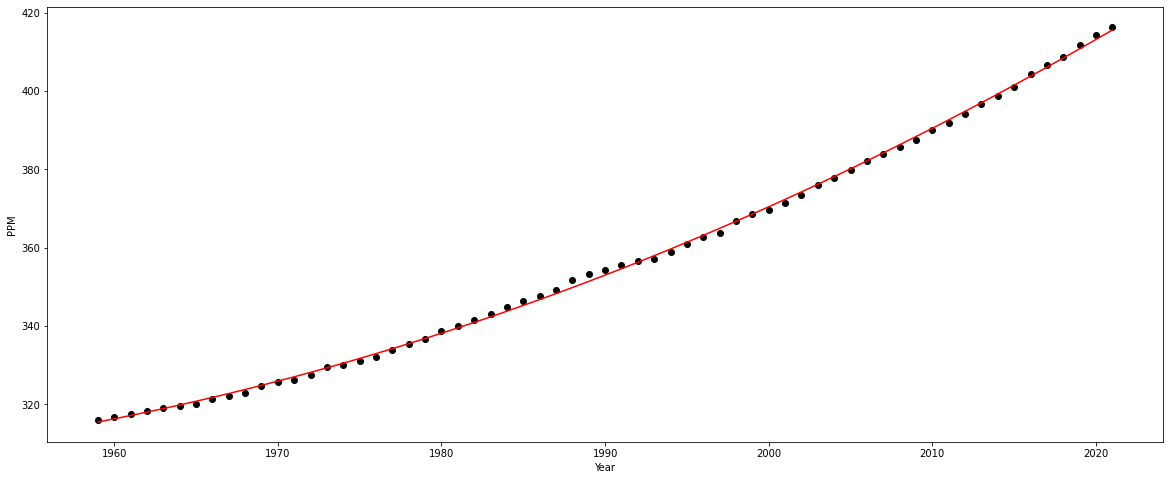

0.013037635619264618
-50.275753666362874
48771.436440129415
Poly2 Prediction Results:
Year-2022 : 418.03
Year-2023 : 420.49
Year-2024 : 422.98
Year-2025 : 425.49
Year-2026 : 428.03
Year-2027 : 430.60
Year-2028 : 433.19
Year-2029 : 435.81
Year-2030 : 438.45
Year-2031 : 441.12
Year-2032 : 443.82
Year-2033 : 446.54
Year-2034 : 449.29
Year-2035 : 452.06
Year-2036 : 454.86
Year-2037 : 457.69
Year-2038 : 460.54
Year-2039 : 463.42
Year-2040 : 466.32
Year-2041 : 469.25
Year-2042 : 472.21
Year-2043 : 475.19
Year-2044 : 478.20
Year-2045 : 481.24
Year-2046 : 484.30
Year-2047 : 487.39
Year-2048 : 490.50
Year-2049 : 493.64
Year-2050 : 496.81
Year-2051 : 500.00
Year-2052 : 503.21
Year-2053 : 506.46
Year-2054 : 509.73
Year-2055 : 513.02
Year-2056 : 516.35
Year-2057 : 519.69
Year-2058 : 523.07
Year-2059 : 526.47
Year-2060 : 529.89
Year-2061 : 533.35
Year-2062 : 536.83
Year-2063 : 540.33
Year-2064 : 543.86
Year-2065 : 547.42
Year-2066 : 551.00
Year-2067 : 554.61
Year-2068 : 558.24
Year-2069 : 561.90
Ye

In [ ]:
#quadratic
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure('PPM~Year', figsize=(20,8))
plt.xlabel('Year')
plt.ylabel('PPM')

# 已有数据
df = pd.read_excel('2022_HiMCM_Data-B-co2.xlsx',sheet_name="origin")
year = df['Year'].tolist()
ppm = df['PPM'].tolist()

plt.scatter(year, ppm, c="black")

coef = np.polyfit(year, ppm, 2)
ppm_fit= np.polyval(coef, year)

plt.plot(year, ppm_fit, c="red")

plt.show()

# y = ax^2 + bx + c
a = coef[0]
b = coef[1]
c = coef[2]
print(a)
print(b)
print(c)

def get_poly2(year):
    return a * year * year + b * year + c

print("Poly2 Prediction Results:")
for i in range(1959, 2022):
    pdict = get_poly2(i)
    dd = pdict - ppm[i-1959]  #difference
    # print('Year-%d : %.2f -> %.2f' % (i, pdict, dd))


for i in range(2022, 2101):
    pdict = get_poly2(i)
    print('Year-%d : %.2f' % (i, pdict))


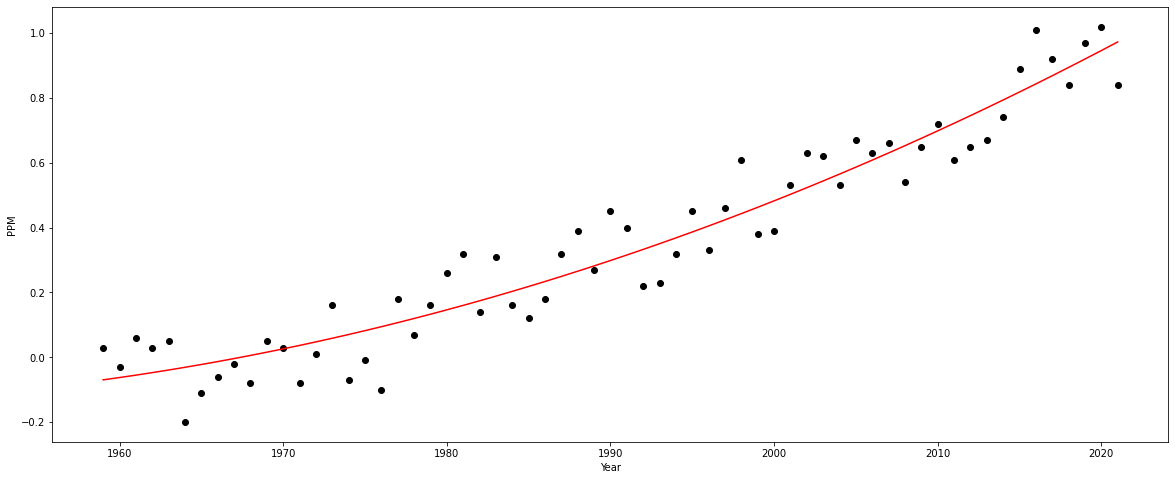

63
0.00015938230639458913
-0.6175232230756564
597.9997510624738
Poly2 Prediction Results:
fit max deviation: 0.233
(142,)
(142,)
(142,)


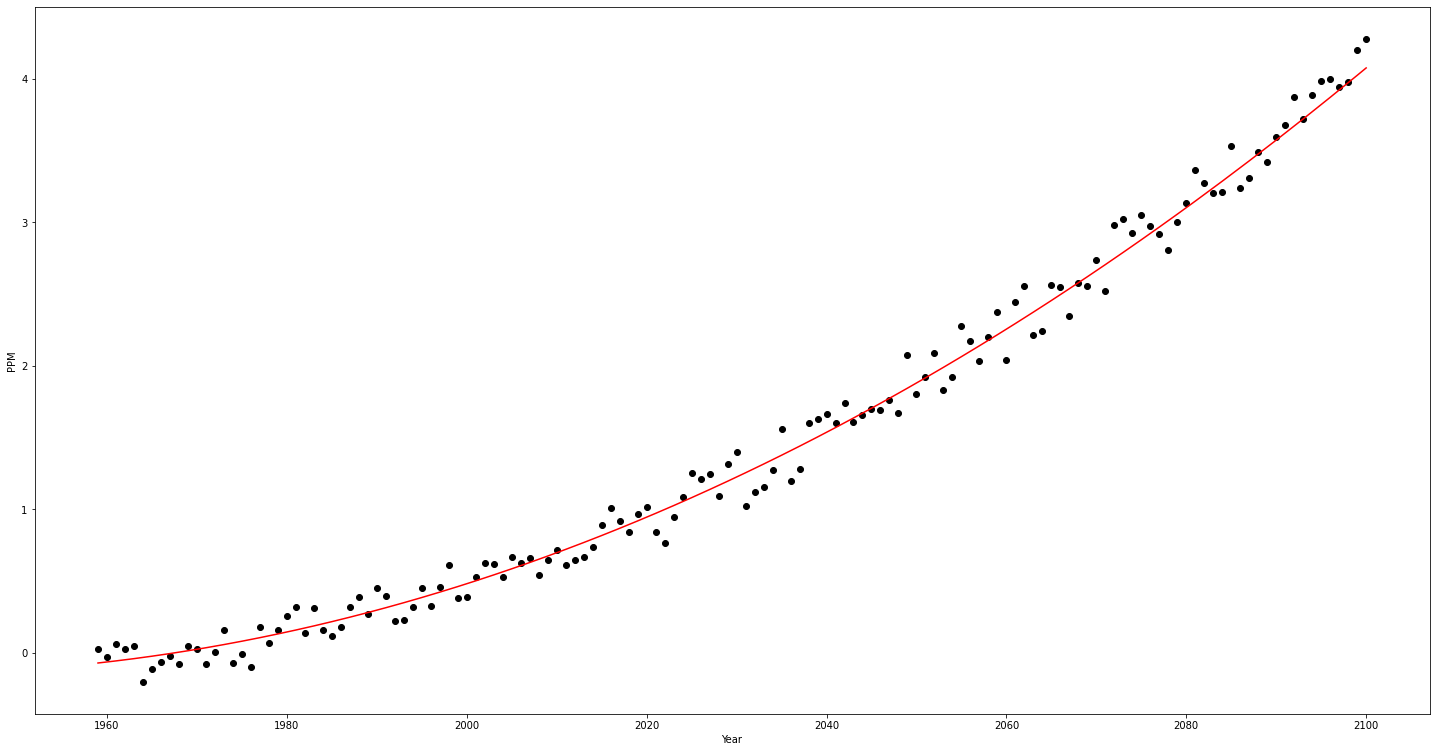

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd




plt.figure('PPM~Year', figsize=(20,8))
plt.xlabel('Year')
plt.ylabel('PPM')

# 已有数据
df = pd.read_excel('2022_HiMCM_Data-B-co2.xlsx',sheet_name="origin")
year = df['Year'].tolist()
degree = df['Degree'].tolist()

plt.scatter(year, degree, c="black")



coef = np.polyfit(year, degree, 2)
ppm_fit= np.polyval(coef, year)

plt.plot(year, ppm_fit, c="red")

plt.show()



print(len(year))

# y = ax^2 + bx + c
a = coef[0]
b = coef[1]
c = coef[2]
print(a)
print(b)
print(c)

def get_poly2(year):
    return a * year * year + b * year + c


maxrange = 0.0

print("Poly2 Prediction Results:")
for i in range(1959, 2022):
    pdict = get_poly2(i)
    dd = pdict - degree[i-1959]  #difference
    if np.abs(dd) - maxrange > 0.001 :
        maxrange = np.abs(dd) 
    # print('Year-%d : %.2f -> %.2f' % (i, pdict, dd))

maxrange = maxrange * 1.2
print("fit max deviation: %.3f" % (maxrange))


for i in range(2022, 2101):
    randft = np.random.default_rng().uniform(low=-1*maxrange, high=maxrange)
    pdict = get_poly2(i) + randft
    # print('Year-%d : %.2f' % (i, pdict))

plt.figure('PPM~Year', figsize=(25,13))
plt.xlabel('Year')
plt.ylabel('PPM')

ystart = 1959
yend_true_data = 2021
yend = 2101

year = np.linspace(ystart, yend-1,yend - ystart )


pdict = np.empty(0,dtype=np.float64)
pdict_scatter = np.empty(0,dtype=np.float64)


for y in range(ystart, yend):
    predict = get_poly2(y)
    pdict = np.append(pdict, predict)

    if y <= yend_true_data:
        # use the real/true numbers.
        pdict_scatter = np.append(pdict_scatter, degree[y-ystart])
        
    else :
        randft = np.random.default_rng().uniform(low=-1*maxrange, high=maxrange)
        pdict_scatter = np.append(pdict_scatter, predict + randft)

print(year.shape)
print(pdict_scatter.shape)
print(pdict.shape)


plt.scatter(year, pdict_scatter, c="black")
plt.plot(year, pdict, c="red")

plt.show()

In [ ]:
#Temperature & 正态分布 & predict
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.metrics import r2_score 



# 已有数据
df = pd.read_excel('2022_HiMCM_Data-B-co2.xlsx',sheet_name="origin")
year = df['Year'].tolist()
degree = df['Degree'].tolist()

# 2次
coef = np.polyfit(year, degree, 2)
degree_fit= np.polyval(coef, year)

fig = go.Figure()
fig.add_traces(go.Scatter(x=year, y=degree, mode = "markers", name = "real data"))
fig.add_traces(go.Scatter(x=year, y=degree_fit, mode = "lines", name = "trendline"))
fig.update_layout( 
        title='Degree Increment with Years',
        title_x=0.5,
        # autosize=False,
        width=1500,
        height=700,
    )
fig.show()




R_square = r2_score(degree, degree_fit) 
print('Coefficient of Determination (R^2): ', R_square) 

# print(len(year))

# y = ax^2 + bx + c
a = coef[0]
b = coef[1]
c = coef[2]
print(a)
print(b)
print(c)

def get_poly2(year):
    return a * year * year + b * year + c

deviation = np.empty(0,dtype=np.float64)

print("Poly2 Prediction Results:")
for i in range(1959, 2022):
    pdict = get_poly2(i)
    dd = pdict - degree[i-1959]  #difference
    deviation = np.append(deviation, dd)

go.Figure(data=[go.Histogram(x=deviation)]).show()

avg = np.average(deviation)
std = np.std(deviation, ddof=1)
print("avg = %.10f, std = %.10f" %(avg, std))

# for i in range(2022, 2101):
#     randft = np.random.normal(avg, std)
#     pdict = get_poly2(i) + randft
#     # print('Year-%d : %.2f' % (i, pdict))


ystart = 1959
yend_true_data = 2021
yend = 2201

year = np.linspace(ystart, yend-1,yend - ystart )

pdict = np.empty(0,dtype=np.float64)
pdict_scatter = np.empty(0,dtype=np.float64)


for y in range(ystart, yend):
    predict = get_poly2(y)
    pdict = np.append(pdict, predict)

    if y <= yend_true_data:
        # use the real/true numbers
        pdict_scatter = np.append(pdict_scatter, degree[y-ystart])
    else:
        randft = np.random.normal(avg, std)
        pdict_scatter = np.append(pdict_scatter, predict + randft)



# fig.add_traces(go.Scatter(x=year, y=pdict_scatter, mode = "markers", name = "data (before/after 2021)"))
fig = go.Figure()

# fig.add_traces(go.Scatter(x=year[:yend_true_data-ystart+1], y=pdict_scatter[:yend_true_data-ystart+1], mode = "markers", name = "true data before 2021"))
# fig.add_traces(go.Scatter(x=year[yend_true_data-ystart+1:], y=pdict_scatter[yend_true_data-ystart+1:], mode = "markers", name = "predict data after 2021"))

fig.add_traces(go.Bar(x=year[:yend_true_data-ystart+1], y=pdict_scatter[:yend_true_data-ystart+1], name = "true data before 2021"))
fig.add_traces(go.Bar(x=year[yend_true_data-ystart+1:], y=pdict_scatter[yend_true_data-ystart+1:], name = "predict data after 2021"))


fig.add_traces(go.Scatter(x=year, y=pdict, mode = "lines", name = "trendline"))

fig.update_layout(
        xaxis = dict(
            title = "Year"
        ),
        yaxis = dict(
            title = "Degree(Celcius)"
        ),
        title='Degree Increment with Years',
        title_x=0.5,
        # autosize=False,
        width=2500,
        height=1000,
    )
fig.show()

Coefficient of Determination (R^2):  0.9194801266755249
0.00015938230639458913
-0.6175232230756564
597.9997510624738
Poly2 Prediction Results:


avg = -0.0000000000, std = 0.0923056345


In [ ]:
#quadratic 正态分布&predict
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.metrics import r2_score 

# 已有数据
df = pd.read_excel('2022_HiMCM_Data-B-co2.xlsx',sheet_name="origin")
year = df['Year'].tolist()
ppm = df['PPM'].tolist()

coef = np.polyfit(year, ppm, 2) #- numpy polyfit
ppm_fit= np.polyval(coef, year)

R_square = r2_score(ppm, ppm_fit) 
print('Coefficient of Determination (R^2): ', R_square) 

print(len(year))

# y = ax^2 + bx + c
a = coef[0]
b = coef[1]
c = coef[2]

print("y = %.3f * X^2 + %.3f * X + %.3f" % (a, b, c))


def get_poly2(year):
    return a * year * year + b * year + c


# maxrange = 0.0
deviation = np.empty(0,dtype=np.float64)

print("Poly2 Prediction Results:")
for i in range(1959, 2022):
    pdict = get_poly2(i)
    dd = pdict - ppm[i-1959]  #difference
    deviation = np.append(deviation, dd)
    # print('Year-%d : %.2f -> %.2f' % (i, pdict, dd))

# print(deviation)
go.Figure(data=[go.Histogram(x=deviation)]).show()

# _____________________________________________________________________________________________


avg = np.average(deviation)
std = np.std(deviation, ddof=1)
print("avg = %.10f, std = %.10f" %(avg, std))

ystart = 1959
yend_true_data = 2021
yend = 2101

year = np.linspace(ystart, yend-1,yend - ystart )

pdict = np.empty(0,dtype=np.float64)
pdict_scatter = np.empty(0,dtype=np.float64)


for y in range(ystart, yend):
    predict = get_poly2(y)
    pdict = np.append(pdict, predict)

    if y <= yend_true_data:
        # use the real/true numbers.
        pdict_scatter = np.append(pdict_scatter, ppm[y-ystart])
        
    else :
        randft = np.random.normal(avg, std)
        pdict_scatter = np.append(pdict_scatter, predict + randft)


fig = go.Figure()
fig.add_traces(go.Scatter(x=year[:yend_true_data-ystart+1], y=pdict_scatter[:yend_true_data-ystart+1], mode = "markers", name = "true data before 2021"))
fig.add_traces(go.Scatter(x=year[yend_true_data-ystart+1:], y=pdict_scatter[yend_true_data-ystart+1:], mode = "markers", name = "predict data after 2021"))
fig.add_traces(go.Scatter(x=year, y=pdict, name = "trendline"))

fig.update_layout( 
        xaxis = dict(
            title = "Year"
        ),
        yaxis = dict(
            title = "PPM"
        ),
        title='PPM Increment with Years',
        title_x=0.5,
        # autosize=False,
        width=2500,
        height=1000,
    )
fig.show()

Coefficient of Determination (R^2):  0.999408675171002
63
y = 0.013 * X^2 + -50.276 * X + 48771.436
Poly2 Prediction Results:


avg = -0.0000000000, std = 0.7258346089


In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.metrics import r2_score


# 已有数据linear和quadratic
df = pd.read_excel('2022_HiMCM_Data-B-co2.xlsx', sheet_name="origin")
year = df['Year'].tolist()
ppm = df['PPM'].tolist()


fig = px.scatter(df, x="PPM", y="Degree", trendline="ols",
                 # log_x=True,
                 # trendline_options=dict(log_x=True)
                 )


fig.show()


fig = px.scatter(df, x="Year", y="Degree", trendline="lowess",
                 # log_x=True,
                 # trendline_options=dict(log_x=True)
                 )

fig.show()


In [ ]:
#相关性
import numpy as np
import pandas as pd


# 已有数据
df = pd.read_excel('2022_HiMCM_Data-B-co2.xlsx',sheet_name="origin")
year = df['Year']
ppm = df['PPM']
degree = df['Degree']

rpd = np.corrcoef(ppm, degree)
print(rpd[0][1])

cp = degree.corr(ppm, method='pearson')  # default - explain why
print(cp)

print(df.corr())



0.961318248780683
0.9613182487806828
0.948970686189994
0.8085541981410037
            Year       PPM    Degree
Year    1.000000  0.991193  0.947712
PPM     0.991193  1.000000  0.961318
Degree  0.947712  0.961318  1.000000


K:capacity  P0:initial_value   r:increase_rate   t:time
[1. 1. 1.]
nan
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


C:\Users\bzhu5\AppData\Local\Temp/ipykernel_4288/3007667058.py:25: RuntimeWarning:

divide by zero encountered in divide

C:\Users\bzhu5\AppData\Roaming\Python\Python39\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning:

Covariance of the parameters could not be estimated

C:\Users\bzhu5\AppData\Local\Temp/ipykernel_4288/3007667058.py:25: RuntimeWarning:

invalid value encountered in double_scalars



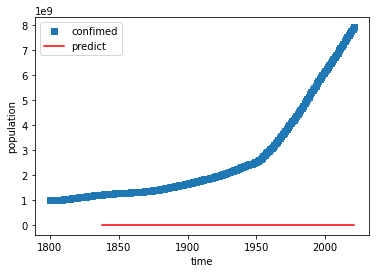

Program done!


In [ ]:
#基于logistic模型人口预测
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def logistic_increase_function(t,K,P0,r):
    # '''
    # t ,list,日期序列,[11,18,19,20 ,21, 22, 23, 24,  25,  26,  27]
    # t0,int,日期首日
    # r,float,r为增长速率，r越大则增长越快，越快逼近K值 - 越陡峭;r越小增长越慢，越慢逼近K值。
    # P0为初始容量，就是t=0时刻的数量
    # K,float,K为环境容量，即增长到最后，P(t)能达到的极限,一般为1
    
    # '''
    t0=1900  # 第一天
    r=0.6
    #   r = 0.55
    # t:time   t0:initial time    P0:initial_value    K:capacity  r:increase_rate
    exp_value=np.exp(r*(t-t0))
    return (K*exp_value*P0)/(K+(exp_value-1)*P0)
 
# '''
# 1.11日41例
# 1.18日45例
# 1.19日62例
# 1.20日291例
# 1.21日440例
# 1.22日571例
# 1.23日830例
# 1.24日1287例
# 1.25日1975例
# 1.26日2744例
# 1.27日4515例
# '''

# 已有数据
df = pd.read_excel('population_world.xlsx',sheet_name="Sheet1")
year = df['Year'].tolist()
popu = df['Population'].tolist()


# 数据处理
# sklearn 拟合输入输出一般都是二维数组，这里将一维转换为二维。
# year = np.array(year).reshape(-1, 1)
# popu = np.array(popu).reshape(-1, 1)

# #  日期及感染人数
# t=[11,18,19,20 ,21, 22, 23, 24,  25,  26,  27]
year=np.array(year)
# P=[41,45,62,291,440,571,830,1287,1975,2744,4515]
popu=np.array(popu)
 
# 用最小二乘法估计拟合
popt, pcov = curve_fit(logistic_increase_function, year, popu)
# popt - K，P0，r
# 最终K=4.01665705e+10人会被感染
# array([7.86278276e+03, 2.96673434e-01, 1.00000000e+00])

#获取popt里面是拟合系数
print("K:capacity  P0:initial_value   r:increase_rate   t:time")
print(popt)


#拟合后预测的P值
P_predict = logistic_increase_function(year,popt[0],popt[1],popt[2])


#未来预测
future=[2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040]
future=np.array(future)
future_predict=logistic_increase_function(future,popt[0],popt[1],popt[2])


#近期情况预测
# tomorrow=[28,29,30,32,33,35,37,40]
# tomorrow=np.array(tomorrow)
# tomorrow_predict=logistic_increase_function(tomorrow,popt[0],popt[1],popt[2])
 
#绘图
plot1 = plt.plot(year, popu, 's',label="confimed")
plot2 = plt.plot(year, P_predict, 'r',label='predict')
# plot3 = plt.plot(tomorrow, tomorrow_predict, 's',label='predict infected people number')
plt.xlabel('time')
plt.ylabel('population')
 
plt.legend(loc=0) #指定legend的位置右下角
 
print(logistic_increase_function(np.array(100),popt[0],popt[1],popt[2]))
# print(logistic_increase_function(np.array(101),popt[0],popt[1],popt[2]))
print(future_predict)

plt.show()
 
 
#未来预测绘图
#plot2 = plt.plot(t, P_predict, 'r',label='polyfit values')
#plot3 = plt.plot(future, future_predict, 'r',label='polyfit values')
#plt.show()
 
 
print("Program done!")


# # # '''
# # # # 拟合年龄
# # # '''
# import numpy as np
# import matplotlib.pyplot as plt

# #定义x、y散点坐标
# x = [2000,2010,2020,2030,2040]
# x = np.array(x)
# print('x is :\n',x)
# num = [174,236,305,334,349,351,342,323]
# y = np.array(num)
# print('y is :\n',y)
# #用3次多项式拟合
# f1 = np.polyfit(x, y, 3)
# print('f1 is :\n',f1)

# p1 = np.poly1d(f1)
# print('p1 is :\n',p1)

# #也可使用yvals=np.polyval(f1, x)

# yvals = p1(x)
# print('yvals is :\n',yvals)


# #绘图
# plot1 = plt.plot(x, y, 's',label='original values')
# plot2 = plt.plot(x, yvals, 'r',label='polyfit values')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend(loc=4) #指定legend的位置右下角
# plt.title('polyfitting')
# plt.show()





In [ ]:
#r2_score
import numpy
actual = [1,2,3,4,5]
predict = [1,2.5,3,4.9,4.9]
 
corr_matrix = numpy.corrcoef(actual, predict)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(R_sq)


from sklearn.metrics import r2_score 

R_square = r2_score(actual, predict) 
print('Coefficient of Determination', R_square) 

0.934602946460654
Coefficient of Determination 0.8929999999999999


In [ ]:
#随机（无正态分布)
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.metrics import r2_score 

df = pd.read_excel('random projection.xlsx',  sheet_name="orig")
df1 = pd.read_excel('random projection.xlsx', sheet_name="pred")

yearo = df['Year'].tolist()
ppmo = df['PPM'].tolist()

yeard = df1['Year'].tolist()
ppmd = df1['PPM'].tolist()

fig = go.Figure()
fig.add_traces(go.Scatter(x=yearo, y=ppmo, mode = "markers+lines", name = "true_data"))
fig.add_traces(go.Scatter(x=yeard, y=ppmd, mode = "markers+lines", name = "predict_data"))

fig.update_layout( 
        xaxis = dict(
            title = "Year"
        ),
        yaxis = dict(
            title = "PPM"
        ),
        title='PPM Increment with Years',
        title_x=0.5,
        # autosize=False,
        width=1500,
        height=800,
    )

fig.show()


In [ ]:
from sympy import *

x, y, t, z, nu = symbols('x y t z nu')

init_printing(use_unicode=True)

print(diff(sin(x)*exp(x), x))

integrate(exp(x)*sin(x) + exp(x)*cos(x), x)

# print(integrate(exp(x)*sin(x) + exp(x)*cos(x), x))

print(integrate(sin(x**2), (x, -oo, oo)))

limit(sin(x)/x, x, 0)

solve(x**2 - 2, x)


# y = Function('y')
# dsolve(Eq(y(t).diff(t, t) - y(t), exp(t)), y(t))

print(expand((x + 2)*(x - 3)))

factor(x**3 - x**2 + x - 1)

factor_list(x**2*z + 4*x*y*z + 4*y**2*z)

cancel((x**2 + 2*x + 1)/(x**2 + x))

solve([x**2 - y**2/exp(x)], [x, y], dict=True)

solveset(x**3 - 6*x**2 + 9*x, x)



exp(x)*sin(x) + exp(x)*cos(x)
sqrt(2)*sqrt(pi)/2
x**2 - x - 6


In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.metrics import r2_score 
from scipy.optimize import curve_fit



# 已有数据
df = pd.read_excel('2022_HiMCM_Data-B-co2.xlsx',sheet_name="origin")
year = df['Year'].to_numpy()
ppm = df['PPM'].to_numpy()

# print(year)
# print(ppm)

coef = np.polyfit(year, np.log(ppm), 1, w=np.sqrt(ppm))
print(coef)

a = np.exp(coef[1])
b = coef[0]
ppm_fit = a * np.exp(b * year)


R_square = r2_score(ppm, ppm_fit) 
print('Coefficient of Determination (R^2): ', R_square) 


fig = go.Figure()
fig.add_traces(go.Scatter(x=year, y=ppm, mode = "markers", name = "real data"))
fig.add_traces(go.Scatter(x=year, y=ppm_fit, mode = "lines", name = "predictline"))
fig.update_layout( 
        title='PPM with Years',
        title_x=0.5,
        # autosize=False,
        width=1500,
        height=700,
    )
fig.show()






# ppm = a * e^ (b * year)
print("y = %.3f * b^ (%.3f * year)" % (a, b))


def get_exp(a, b, year):
    return a * np.exp(b * year)




deviation = np.empty(0,dtype=np.float64)



for i in range(1959, 2022):
    pdict = get_exp(a, b, i)
    dd = pdict - ppm[i-1959]  #difference
    deviation = np.append(deviation, dd)
    # print('Year-%d : %.2f -> %.2f' % (i, pdict, dd))


# print(deviation)
go.Figure(data=[go.Histogram(x=deviation)]).show()

# _____________________________________________________________________________________________


avg = np.average(deviation)
std = np.std(deviation, ddof=1)
print("avg = %.10f, std = %.10f" %(avg, std))
# x = np.random.normal(avg, std, 10000)
# go.Figure(data=[go.Histogram(x=x)]).show()




ystart = 1959
yend_true_data = 2021
yend = 2101

year = np.linspace(ystart, yend-1,yend - ystart )


pdict = np.empty(0,dtype=np.float64)
pdict_scatter = np.empty(0,dtype=np.float64)


for y in range(ystart, yend):
    predict = get_exp(a,b,y)
    pdict = np.append(pdict, predict)

    if y <= yend_true_data:
        # use the real/true numbers.
        pdict_scatter = np.append(pdict_scatter, ppm[y-ystart])
        
    else :
        randft = np.random.normal(avg, std)
        pdict_scatter = np.append(pdict_scatter, predict + randft)


fig = go.Figure()
# fig.add_traces(go.Scatter(x=year[:yend_true_data-ystart+1], y=pdict_scatter[:yend_true_data-ystart+1], mode = "markers", name = "true data before 2021"))
# fig.add_traces(go.Scatter(x=year[yend_true_data-ystart+1:], y=pdict_scatter[yend_true_data-ystart+1:], mode = "markers", name = "predict data after 2021"))
# fig.add_traces(go.Scatter(x=year, y=pdict, mode = "lines", name = "trendline"))

fig.add_traces(go.Bar(x=year[:yend_true_data-ystart+1], y=pdict_scatter[:yend_true_data-ystart+1], name = "true data before 2021"))
fig.add_traces(go.Bar(x=year[yend_true_data-ystart+1:], y=pdict_scatter[yend_true_data-ystart+1:], name = "predict data after 2021"))
fig.add_traces(go.Scatter(x=year, y=pdict, name = "trendline"))


fig.update_layout( 
        xaxis = dict(
            title = "Year"
        ),
        yaxis = dict(
            title = "PPM"
        ),
        title='PPM Increment with Years',
        title_x=0.5,
        # autosize=False,
        width=2500,
        height=1000,
    )
fig.show()



# x_exact = np.linspace(1900, np.max(2100), 2100-1900+1)
# y_exact = a * np.exp(b * x_exact)

# fig = go.Figure()
# fig.add_traces(go.Bar(x=x_exact, y=y_exact))
# fig.show()





[ 0.00452272 -3.1248774 ]
Coefficient of Determination (R^2):  0.990630269677001


y = 0.044 * b^ (0.005 * year)


avg = 0.0114759280, std = 2.8892470557


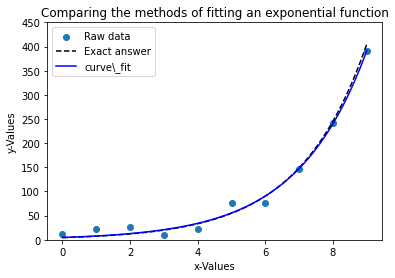

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Set a seed for the random number generator so we get the same random numbers each time
np.random.seed(20210706)

# Create fake x-data
x = np.arange(10)
# Create fake y-data
a = 4.5
b = 0.5
y = a * np.exp(b * x)  # Use the second formulation from above
y = y + np.random.normal(scale=np.sqrt(np.max(y)), size=len(x))  # Add noise

#
# Exact answer
#
x_exact = np.linspace(np.min(x), np.max(x), 100)
y_exact = a * np.exp(b * x_exact)



#
# curve_fit
#
# Fit the function a * np.exp(b * t) to x and y
popt, pcov = curve_fit(lambda t, aa, bb: aa * np.exp(bb * t), x, y)
# Extract the optimised parameters
a = popt[0]
b = popt[1]
x_fitted_curve_fit = np.linspace(np.min(x), np.max(x), 100)
y_fitted_curve_fit = a * np.exp(b * x_fitted_curve_fit)

# Plot
ax = plt.axes()
ax.scatter(x, y, label='Raw data')
ax.plot(x_exact, y_exact, 'k--', label='Exact answer')

ax.plot(x_fitted_curve_fit, y_fitted_curve_fit, 'b', label=r'curve\_fit')
ax.set_title('Comparing the methods of fitting an exponential function')
ax.set_ylabel('y-Values')
ax.set_ylim(0, 450)
ax.set_xlabel('x-Values')
ax.legend()

In [ ]:

# 将包导入
import tensorflow as tf 
import numpy as np 
from  tensorflow.examples.tutorials.mnist  import  input_data
import matplotlib as plt 


# 读取 moist 数据集
mnist = input_data.read_data_sets('data', one_hot = True)

# 设置参数
num_classes = 10 # 要分成 10 类 
input_size = 784 # 因为 moist的数据集每张图片有 28 ＊ 28 * 1个像素点
training_iterations = 10000 # 训练迭代次数
batch_size = 64 # 分批训练 一次取64个 batch 进行训练 (batch 应该尽量取大一点)


#使用 placeholder 进行占位 None 表示第一维度大小任意
X = tf.placeholder (tf.float32, shape = [None, input_size])
Y = tf.placeholder (tf.float32, shape = [None, num_classes])

# 使用 高维线性边界，假设边界参数
W = tf.Variable (tf.random_normal ([input_size,num_classes], stddev = 0.1)) 
b = tf.Variable (tf.constant (0.1), [num_classes])

# 计算预测值
y_pred = tf.nn.softmax (tf.matmul (X,W) + b)

# 搭建计算图 
loss = tf.reduce_mean (tf.square (Y - y_pred))
# loss 使用均方误差
opt = tf.train.GradientDescentOptimizer (0.05).minimize (loss)
# 使用梯度下降的方法最小化误差 0.05 是学习率
init = tf.global_variables_initializer ()
correct_prediction = tf.equal (tf.argmax (Y,1), tf.argmax (y_pred,1)) # 计算正确的个数 argmax 函数第一维表示 数据集 1 表示按照行 0 表示按照列 如果没有的话 表示整体求最大值 返回最大值所在的下标向量，然后 equal 对两个向量进行比较 相同得到1 不同得到0 
accuracy = tf.reduce_mean (tf.cast (correct_prediction, 'float')) 
# 对上面得到的正确率取平均

# 进行迭代运算
sess = tf.Session ()
sess.run (init)
for i in range (training_iterations) :
    batch = mnist.train.next_batch (batch_size) # 每次取出 64 个 数据进行训练
    batch_input = batch[0] # 取出数据的第一维就是 输入的图像
    batch_labels = batch[1] # 取出第二维 就是 它的 label 值 
    training_loss = sess.run ([opt, loss], feed_dict = {X: batch_input, Y: batch_labels})
    # 计算当前的损失值
    if i % 1000 == 0 :
        train_accuracy = accuracy.eval (session = sess, feed_dict = {X: batch_input,Y: batch_labels})
        print ("step : %d, training accuracy = %g " % (i, train_accuracy)) # 打印正确率


ModuleNotFoundError: No module named 'tensorflow.examples'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.markers as mks
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import random


class LogisticRegressionClass(object):
    def __init__(self, dataX, dataY, testX, testY, learningRate, loopNum):
        # X为输入的矩阵，一行代表一份数据，行数代表样本的数量，列数代表样本的维数
        # Y为对应的结果值
        # learningRate表示学习率
        # loopNum表示训练的次数
        self.trainX = dataX
        self.trainY = dataY
        self.learningRate = learningRate
        self.loopNum = loopNum
        self.Y_Train = np.array([self.trainY]).T  # 转化为列向量
        self.X_Train = np.column_stack((dataX, np.repeat(1, dataX.shape[0])))  # 扩充矩阵一列全1，变成广义矩阵，作用是与偏置项进行乘积
        self.parameter = np.array([np.ones(self.X_Train.shape[1])]).T  # 最后一位为偏置项
        self.testX = testX
        self.testY = testY
        self.Y_Test = np.array([self.testY]).T
        self.X_Test = np.column_stack((testX, np.repeat(1, testX.shape[0])))
        self.WTX = None  # W为参数，T为转置，X为数据
        self.error = None  # 误差
        self.derivative = None  # 梯度值

    def GradientDecent(self):
        # 梯度下降法
        # 梯度的计算值是根据最大似然估计得出的结论
        for i in range(self.loopNum):
            self.WTX = np.dot(self.X_Train, self.parameter)
            Sig_Wtx = SigmoidFunction(self.WTX)  # (398, 1)
            self.error = Sig_Wtx - self.Y_Train
            self.derivative = np.dot(self.X_Train.T, self.error)
            self.parameter -= self.learningRate * self.derivative
            self.show_training()
            plt.pause(0.03)
        plt.show()

    def StochasticGradientDecent(self):
        # 随机梯度下降法
        count = 0
        for loop in range(self.loopNum):
            List_NoRepeat_Random = random.sample(range(0, self.X_Train.shape[0]), self.X_Train.shape[0])
            for index in List_NoRepeat_Random:
                self.WTX = np.dot(self.X_Train[index], self.parameter)
                Sig_Wtx = SigmoidFunction(self.WTX)
                self.error = np.matrix(self.Y_Train[index] - Sig_Wtx)
                self.derivative = np.dot(np.matrix(self.X_Train[index]).T, self.error)
                self.parameter += self.learningRate * self.derivative
                # 每五十次训练进行一次输出结果的显示
                count += 1
                if count % 50 == 0:
                    self.show_training()
                    plt.pause(0.03)
        plt.show()

    def Train_acc(self):
        # 训练集的正确率计算
        predict_y = np.dot(self.X_Train, self.parameter)
        predict_y = SigmoidFunction(predict_y)
        predict_y = np.where(predict_y > 0.5, 1, 0)
        predict_y = predict_y ^ self.Y_Train
        acc = (self.X_Train.shape[0] - np.sum(predict_y)) / self.X_Train.shape[0]
        print('Train_acc= {:.2%}'.format(acc))

    def Test_acc(self):
        # 测试集的正确率计算
        predict_y = np.dot(self.X_Test, self.parameter)
        predict_y = SigmoidFunction(predict_y)
        predict_y = np.where(predict_y > 0.5, 1, 0)
        predict_y = predict_y ^ self.Y_Test
        acc = (self.testX.shape[0] - np.sum(predict_y)) / self.testX.shape[0]
        print('Test_acc= {:.2%}'.format(acc))

    def show_training(self):
        # 对训练出的参数进行输出显示
        Param = Para_manager(self.parameter)
        self.train_show(Param)

    def test_show(self, Param):
        # 验证集输出显示
        X_index = np.column_stack((self.testX[:, 0], np.repeat(1, self.testX.shape[0])))
        pre = np.dot(X_index, Param)
        plotMatrixPoint(self.testX, self.testY, pre)

    def train_show(self, Param):
        # 训练集输出显示
        X_index = np.column_stack((self.trainX[:, 0], np.repeat(1, self.trainX.shape[0])))
        pre = np.dot(X_index, Param)
        plotMatrixPoint(self.trainX, self.trainY, pre)


def SigmoidFunction(X):
    return 1. / (1. + np.exp(-X))


def Para_manager(Param):
    # 把三维的参数转化为能够在plt图上显示的y=kx+b的格式，返回k与b
    Param[0] /= -Param[1]
    Param[2] /= -Param[1]
    Param = np.array([Param[0], Param[2]])
    return Param


def DIY_Scatter(x, y, ax=None, m=None, **kw):
    # 自定义参数设计
    if not ax:
        ax = plt.gca()
    sc = ax.scatter(x, y, **kw)
    if m is not None and len(m) == len(x):
        paths = []
        for marker in m:
            if isinstance(marker, mks.MarkerStyle):
                marker_obj = marker
            else:
                marker_obj = mks.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                marker_obj.get_transform())
            paths.append(path)
        sc.set_paths(paths)
    return sc


def plotMatrixPoint(dataX, dataY, predict):
    plt.clf()
    x = dataX[:, 0]
    y = dataX[:, 1]
    map_size = {0: 30, 1: 30}  # 大小
    size = list(map(lambda index: map_size[index], dataY))
    map_color = {0: 'r', 1: 'g'}  # 颜色
    color = list(map(lambda index: map_color[index], dataY))
    map_marker = {0: 'o', 1: 's'}  # 形状
    markers = list(map(lambda index: map_marker[index], dataY))
    DIY_Scatter(x, y, s=size, c=color, m=markers)  # scatter函数只支持array类型数据
    plt.axis([1.25 * min(x), 1.25 * max(x), 1.25 * min(y), 1.25 * max(y)])
    plt.plot(dataX[:, 0], predict, color='red', linewidth=1)


if __name__ == "__main__":
    breast_cancer = datasets.load_breast_cancer()
    data_X = breast_cancer.data
    data_Y = breast_cancer.target

    data_X = data_X[:, 0:2]  # 取了原数据集中的两列，作为后续能够显示的数据集基础

    train_X, test_X, train_Y, test_Y = train_test_split(data_X, data_Y, test_size=0.3, random_state=123)
    # 对训练集测试集进行正则化
    Scaler = StandardScaler().fit(train_X)
    train_X = Scaler.transform(train_X)
    test_X = Scaler.transform(test_X)

    LogisticX = LogisticRegressionClass(train_X, train_Y, test_X, test_Y, 0.01, 100)
    # LogisticX.GradientDecent()
    LogisticX.StochasticGradientDecent()
    LogisticX.Test_acc()



In [ ]:
import numpy as np


def perdict(w,x): #根据权重和逻辑函数求解最新的预测值，x为单个数据
    if len(w) != len(x):
        print("w和x的维度不一致")
        return None
    z=0
    for index in range(len(w)):
       z = z + w[index]*x[index]
    y = (1+np.e**-(z))**-1
    return y

def upadteWeight(oldW, data, predict, label): #按照梯度下降的原则更新权重
    offset = np.array([np.array(data[i]) * (label[i] - j) for i,j in enumerate(predict)])
    offset = np.array([np.sum(offset[...,index]) for index in range(len(w))])/len(data)
    newW = oldW + offset
    return newW

if __name__ == '__main__':
    data = [[1,0,1],[2,0,1],[3,0,1],[8,9,1],[9,9,1],[10,9,1]]
    label = [1970, 1980, 1990, 2000, 2010, 2020,2030,2040,2050,2060]
    w = [0,0,0]
    while True:
        predicts = [perdict(w,index) for index in data]
        w=upadteWeight(w, data, predicts, label)
        if sum(predicts[:3])<0.5 and sum(predicts[3:])>2: #设置更新退出条件，前三个的预测值足够第（代表类别为0），后三个预测足够高（类别为1）
            break;
    print("w:", w)
    print("predict:", predicts)
    print(perdict(w,[10,8,1]))


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.metrics import r2_score 
from scipy.optimize import curve_fit


# 已有数据
df = pd.read_excel('2022_HiMCM_Data-B-co2.xlsx',sheet_name="origin")
year = df['Year'].to_numpy()
ppm = df['PPM'].to_numpy()

if __name__ == '__main__':
    data=load_breast_cancer() #加载数据集
    X =data['data'] #数据
    Y = data['target'] #标签
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1) #划分测试集和训练集
    l1 = LogisticRegression(penalty="l1",C=0.5,solver="liblinear") #配置逻辑回归，penalty为正则化，solver为求解w的方法
    l1.fit(X_train,Y_train)
    score =  l1.score(X_test,Y_test)
    print(score)


In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_excel('2022_HiMCM_Data-B.xlsx',sheet_name = 'Sheet4')
X = dataset['Year'].values
y = dataset['PPM'].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# sklearn 拟合输入输出一般都是二维数组，这里将一维转换为二维。
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
# y_train = np.array(y_train).reshape(-1, 1)
# y_test = np.array(y_test).reshape(-1, 1)

# ppm = np.array(ppm).reshape(-1, 1)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
print(y_train)
classifier.fit(X_train, y_train.astype('int'))

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

# Visualing the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

[369.71 411.66 341.48 416.45 366.84 360.97 373.45 362.74 408.72 351.69
 357.21 346.35 363.88 394.06 358.96 401.01 349.31 398.81 340.12 382.09
 356.54 396.74 377.7  347.61 375.98 371.32 368.54 353.2  414.24 343.15
 338.76]


ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

In [ ]:
#CO2 Emission
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.metrics import r2_score 

df = pd.read_excel('CO2EMISSION.xlsx',sheet_name = 'Sheet1')
df1 = pd.read_excel('CO2EMISSION.xlsx',sheet_name = 'Sheet2')

# USA
yearo = df['Year'].tolist()
ppmo = df['Emission'].tolist()

# China
yearc = df1['Year'].tolist()
ppmc = df1['Emission'].tolist()

fig1 = go.Figure()
fig1.add_traces(go.Scatter(x=yearo, y=ppmo, mode = "markers+lines", name = "PPM"))
# fig.add_traces(go.Scatter(x=yeard, y=ppmd, mode = "markers+lines", name = "predict_data")

fig1.update_layout( 
        xaxis = dict(
            title = "Year"
        ),
        yaxis = dict(
            title = "CO2 Emission"
        ),
        title='CO2 Emission in USA',
        title_x=0.5,
        # autosize=False,
        width=1500,
        height=800,
    )

fig2 = go.Figure()
fig2.add_traces(go.Scatter(x=yearc, y=ppmc, mode = "markers+lines", name = "PPM"))
# fig.add_traces(go.Scatter(x=yeard, y=ppmd, mode = "markers+lines", name = "predict_data")

fig2.update_layout( 
        xaxis = dict(
            title = "Year"
        ),
        yaxis = dict(
            title = "CO2 Emission"
        ),
        title='CO2 Emission in China',
        title_x=0.5,
        # autosize=False,
        width=1500,
        height=800,
    )

fig1.show()
fig2.show()


In [ ]:
# Population
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.metrics import r2_score 

df = pd.read_excel('CO2EMISSION.xlsx',sheet_name = 'Sheet4')
df1 = pd.read_excel('CO2EMISSION.xlsx',sheet_name = 'Sheet3')

# USA
yearo = df['Year'].tolist()
ppmo = df['Population'].tolist()

# China
yearc = df1['Year'].tolist()
ppmc = df1['Population'].tolist()

fig1 = go.Figure()
fig1.add_traces(go.Scatter(x=yearo, y=ppmo, mode = "markers+lines", name = "PPM"))
# fig.add_traces(go.Scatter(x=yeard, y=ppmd, mode = "markers+lines", name = "predict_data")

fig1.update_layout( 
        xaxis = dict(
            title = "Year"
        ),
        yaxis = dict(
            title = "Population"
        ),
        title='Population Growth in USA',
        title_x=0.5,
        # autosize=False,
        width=1500,
        height=800,
    )

fig2 = go.Figure()
fig2.add_traces(go.Scatter(x=yearc, y=ppmc, mode = "markers+lines", name = "PPM"))
# fig.add_traces(go.Scatter(x=yeard, y=ppmd, mode = "markers+lines", name = "predict_data")

fig2.update_layout( 
        xaxis = dict(
            title = "Year"
        ),
        yaxis = dict(
            title = "Population"
        ),
        title='Population Growth in China',
        title_x=0.5,
        # autosize=False,
        width=1500,
        height=800,
    )

fig1.show()
fig2.show()


In [ ]:
# GDP
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.metrics import r2_score 

df = pd.read_excel('CO2EMISSION.xlsx',sheet_name = 'Sheet4')
df1 = pd.read_excel('CO2EMISSION.xlsx',sheet_name = 'Sheet3')

# USA
yearo = df['Year'].tolist()
ppmo = df['Population'].tolist()

# China
yearc = df1['Year'].tolist()
ppmc = df1['Population'].tolist()

fig1 = go.Figure()
fig1.add_traces(go.Scatter(x=yearo, y=ppmo, mode = "markers+lines", name = "PPM"))
# fig.add_traces(go.Scatter(x=yeard, y=ppmd, mode = "markers+lines", name = "predict_data")

fig1.update_layout( 
        xaxis = dict(
            title = "Year"
        ),
        yaxis = dict(
            title = "Population"
        ),
        title='Population Growth in USA',
        title_x=0.5,
        # autosize=False,
        width=1500,
        height=800,
    )

fig2 = go.Figure()
fig2.add_traces(go.Scatter(x=yearc, y=ppmc, mode = "markers+lines", name = "PPM"))
# fig.add_traces(go.Scatter(x=yeard, y=ppmd, mode = "markers+lines", name = "predict_data")

fig2.update_layout( 
        xaxis = dict(
            title = "Year"
        ),
        yaxis = dict(
            title = "Population"
        ),
        title='Population Growth in China',
        title_x=0.5,
        # autosize=False,
        width=1500,
        height=800,
    )

fig1.show()
fig2.show()


In [ ]:
# GDP
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.metrics import r2_score 

df = pd.read_excel('2022_HiMCM_Data-B.xlsx',sheet_name = 'CO2 Data Set 1')
df1 = pd.read_excel('2022_HiMCM_Data-B.xlsx',sheet_name = 'Sheet4')

# Original
yearo = df['Year'].tolist()
ppmo = df['PPM'].tolist()

# After
yearc = df1['Year'].tolist()
ppmc = df1['PPM'].tolist()

fig1 = go.Figure()
fig1.add_traces(go.Scatter(x=yearo, y=ppmo, mode = "markers", name = "PPM"))
# fig.add_traces(go.Scatter(x=yeard, y=ppmd, mode = "markers+lines", name = "predict_data"))

fig1.update_layout( 
        xaxis = dict(
            title = "Year"
        ),
        yaxis = dict(
            title = "PPM"
        ),
        title='CO2 in Atmosphere',
        title_x=0.5,
        # autosize=False,
        width=1500,
        height=800,
    )

fig2 = go.Figure()
fig2.add_traces(go.Scatter(x=yearc, y=ppmc, mode = "markers", name = "PPM"))
# fig.add_traces(go.Scatter(x=yeard, y=ppmd, mode = "markers+lines", name = "predict_data")

fig2.update_layout( 
        xaxis = dict(
            title = "Year"
        ),
        yaxis = dict(
            title = "PPM"
        ),
        title='CO2 in Atmosphere between 1980-2021',
        title_x=0.5,
        # autosize=False,
        width=1500,
        height=800,
    )

fig1.show()
fig2.show()


In [ ]:
# change in ppm
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.metrics import r2_score 

df = pd.read_excel('CO2EMISSION.xlsx',sheet_name = 'Sheet5')

yearo = df['Year'].tolist()
ppmo = df['Change in PPM'].tolist()

fig1 = go.Figure()
obj = go.Table(header = dict(values=["Year", "Change in PPM"]),
                cells = dict(values=[yearo, ppmo]))
# fig.add_traces(go.Scatter(x=yeard, y=ppmd, mode = "markers+lines", name = "predict_data")
fig1.add_trace(obj)
fig1.show()

# fig1.update_layout( 
#         xaxis = dict(
#             title = "Year"
#         ),
#         yaxis = dict(
#             title = "Population"
#         ),
#         title='Population Growth in USA',
#         title_x=0.5,
#         # autosize=False,
#         width=1500,
#         height=800,
#     )


In [ ]:
import warnings                                  # do not disturbe mode
warnings.filterwarnings('ignore')

# Load packages
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

# Importing everything from forecasting quality metrics
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

# MAPE 平均绝对误差
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    # """
    #     Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
    #     y - timeseries
    #     lags - how many lags to include in ACF, PACF calculation
    # """
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()


ads = pd.read_csv('2022_HiMCM_Data-B.xlsx'',index_col=['Time'], parse_dates=['Time'])

plt.figure(figsize=(18, 6))
plt.plot(ads.Ads)
plt.title('Ads watched (hourly data)')
plt.grid(True)
plt.show()

tsplot(ads.Ads, lags=60)

# The seasonal difference
ads_diff = ads.Ads - ads.Ads.shift(24)
tsplot(ads_diff[24:], lags=60)

ads_diff = ads_diff - ads_diff.shift(1)
tsplot(ads_diff[24+1:], lags=60)

# setting initial values and some bounds for them
ps = range(2, 5)
d=1 
qs = range(2, 5)
Ps = range(0, 2)
D=1 
Qs = range(0, 2)
s = 24 # season length is still 24

# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

def optimizeSARIMA(y, parameters_list, d, D, s):
    # """Return dataframe with parameters and corresponding AIC
        
    #     y - time series
    #     parameters_list - list with (p, q, P, Q) tuples
    #     d - integration order in ARIMA model
    #     D - seasonal integration order 
    #     s - length of season
    # """
    
    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(y, order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except Exception:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)

    return result_table

%%time
warnings.filterwarnings("ignore") 
result_table = optimizeSARIMA(ads.Ads, parameters_list, d, D, s)

result_table.head()

# set the parameters that give the lowest AIC
p, q, P, Q = result_table.parameters[0]

best_model=sm.tsa.statespace.SARIMAX(ads.Ads, order=(p, d, q), 
                                        seasonal_order=(P, D, Q, s)).fit(disp=-1)
print(best_model.summary())

tsplot(best_model.resid[24+1:], lags=60)

def plotSARIMA(series, model, n_steps):
    # """Plots model vs predicted values
        
    #     series - dataset with timeseries
    #     model - fitted SARIMA model
    #     n_steps - number of steps to predict in the future    
    # """
    
    # adding model values
    data = series.copy()
    data.columns = ['actual']
    data['sarima_model'] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    data['sarima_model'][:s+d] = np.NaN
    
    # forecasting on n_steps forward 
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    forecast = data.sarima_model.append(forecast)
    # calculate error, again having shifted on s+d steps from the beginning
    error = mean_absolute_percentage_error(data['actual'][s+d:], data['sarima_model'][s+d:])

    plt.figure(figsize=(15, 7))
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    plt.plot(forecast, color='r', label="model")
    plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
    plt.plot(data.actual, label="actual")
    plt.legend()
    plt.grid(True)

plotSARIMA(ads, best_model, 50)


FileNotFoundError: [Errno 2] No such file or directory: 'ads.csv'